<a href="https://colab.research.google.com/github/ourekouch/data-visualization-with-py/blob/master/survey_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing libraries
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np


In [3]:
surv=pd.read_csv('https://cocl.us/datascience_survey_data')
#give unnamed column a name and set the first column as index
new_columns = surv.columns.values
new_columns[0] = 'Topic'
surv.columns = new_columns
surv = surv.set_index('Topic')
del surv.index.name
#show dataframe
surv.head()

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136


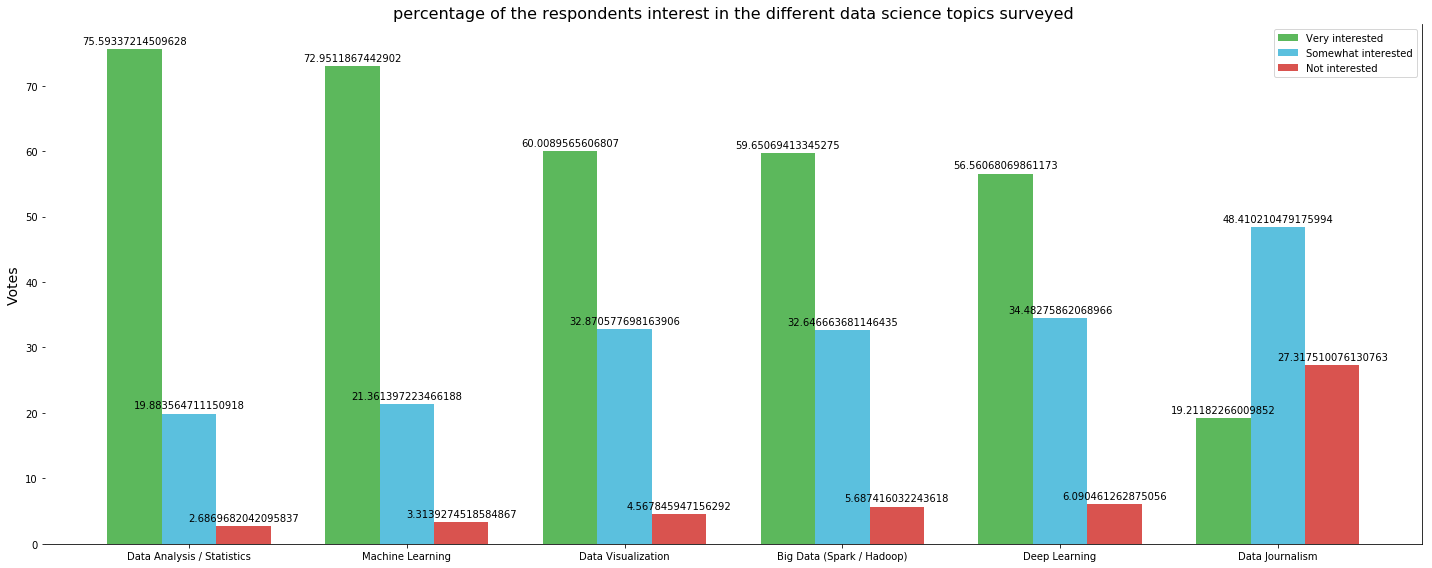

In [44]:
#sort
surv_sorted=surv.sort_values(['Very interested'], ascending=False, axis=0, inplace=False)
#make % values
surv_sorted=(surv_sorted/2233)*100

#colors
color_bar=["#5cb85c","#5bc0de","#d9534f"]

size=list(surv_sorted.shape)
x = np.arange(size[0])  # the label locations
width = 0.25  # the width of the bars
fig, ax = plt.subplots()
recta = ax.bar(x -width, surv_sorted['Very interested'], width, label='Very interested',color=color_bar[0])
rectb = ax.bar(x  , surv_sorted['Somewhat interested'], width, label='Somewhat interested',color=color_bar[1])
rectc = ax.bar(x +width, surv_sorted['Not interested'], width, label='Not interested',color=color_bar[2])
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Votes',fontsize=14)
ax.set_title('percentage of the respondents interest in the different data science topics surveyed',fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(list(surv_sorted.index.values))
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(recta)
autolabel(rectb)
autolabel(rectc)

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)

fig.set_size_inches(20,8)
fig.tight_layout()
plt.show()

#removing top and right borders
#plt.spines['top'].set_visible(False)
#plt.spines['right'].set_visible(False)


